In [1]:
#PANDAS IMPORT
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown, Latex
%matplotlib inline

df = pd.read_csv ('BankChurners.csv')
df.drop(columns=['Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1',
                 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',
                 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
                 'Avg_Utilization_Ratio', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Trans_Amt', 'Total_Trans_Ct'], inplace=True)
Ndf = df.select_dtypes(include='number', exclude=None)
Ldf = df.select_dtypes(include=None, exclude='number')
display(df)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3


In [2]:
#NUMERIC DATAFRAME
TotNrVl = Ndf.count(0)
percent_missing = Ndf.isnull().sum() * 100 / len(df)
cardinality = Ndf.nunique(axis=0, dropna=True)
minimum = Ndf.min(axis=0)
maximum = Ndf.max(axis=0)
q1 = Ndf.quantile(q=0.25, axis=0)
q3 = Ndf.quantile(q=0.75, axis=0)
average = Ndf.mean(axis=0)
median = Ndf.quantile(q=0.50, axis=0)
standDeviation = Ndf.std(axis=0)

In [3]:
#TABLE NUMERIC DATAFRAME
TableNdf = pd.DataFrame({'TotNrVl': TotNrVl,
                       'Percent_missing': percent_missing,
                       'Cardinality': cardinality,
                       'Min': minimum,
                       'Max': maximum,
                       'Q1': q1,
                       'Q3': q3,
                       'Average': average,
                       'Median': median,
                       'StandDeviation': standDeviation
                      })
display(TableNdf)

,TotNrVl,Percent_missing,Cardinality,Min,Max,Q1,Q3,Average,Median,StandDeviation
CLIENTNUM,10127,0.0,10127,708082083,828343083,713036770.5,773143533.0,7.391776e+08,717926358.0,3.690378e+07
Customer_Age,10127,0.0,45,26,73,41.0,52.0,4.632596e+01,46.0,8.016814e+00
Dependent_count,10127,0.0,6,0,5,1.0,3.0,2.346203e+00,2.0,1.298908e+00
Months_on_book,10127,0.0,44,13,56,31.0,40.0,3.592841e+01,36.0,7.986416e+00
Total_Relationship_Count,10127,0.0,6,1,6,3.0,5.0,3.812580e+00,4.0,1.554408e+00
Months_Inactive_12_mon,10127,0.0,7,0,6,2.0,3.0,2.341167e+00,2.0,1.010622e+00


In [4]:
#OTHER LITERAL DATAFRAME
def get_Mode1(df) -> list:
    res = []
    for index, column in enumerate(df):
        frequencies = df[column].value_counts()
        res.append(frequencies.index[0])
    return res

def get_FreqMode1(df) -> list:
    res = []
    for index, column in enumerate(df):
        frequencies = df[column].value_counts()
        res.append(frequencies[0])
    return res

def get_PercMode1(df) -> list:
    res = []
    for index, column in enumerate(df):
        frequencies = df[column].value_counts()
        res.append((frequencies[0] / len(df)) * 100)
    return res
def get_Mode2(df) -> list:
    res = []
    for index, column in enumerate(df):
        frequencies = df[column].value_counts()
        res.append(frequencies.index[0])
    return res

def get_FreqMode2(df) -> list:
    res = []
    for index, column in enumerate(df):
        frequencies = df[column].value_counts()
        res.append(frequencies[1])
    return res

def get_PercMode2(df) -> list:
    res = []
    for index, column in enumerate(df):
        frequencies = df[column].value_counts()
        res.append((frequencies[1] / len(df)) * 100)
    return res

In [5]:
#LITERAL DATAFRAME
TotNrVl = Ldf.count(0)
percent_missing = Ldf.isnull().sum() * 100 / len(df)
cardinality = Ldf.nunique(axis=0, dropna=True)

In [6]:
#TABLE LITERAL DATAFRAME
TableLdf = pd.DataFrame({'TotNrVl': TotNrVl,
                       'Percent_missing': percent_missing,
                       'Cardinality': cardinality,
                       'Mode1': get_Mode1(Ldf),
                       'FreqMode1': get_FreqMode1(Ldf),
                       'PercMode1': get_PercMode1(Ldf),
                       'Mode2': get_Mode2(Ldf),
                       'FreqMode2': get_FreqMode2(Ldf),
                       'PercMode2': get_PercMode2(Ldf)
                      })
display(TableLdf)

,TotNrVl,Percent_missing,Cardinality,Mode1,FreqMode1,PercMode1,Mode2,FreqMode2,PercMode2
Attrition_Flag,10127,0.0,2,Existing Customer,8500,83.934038,Existing Customer,1627,16.065962
Gender,10127,0.0,2,F,5358,52.908068,F,4769,47.091932
Education_Level,10127,0.0,7,Graduate,3128,30.887726,Graduate,2013,19.877555
Marital_Status,10127,0.0,4,Married,4687,46.282216,Married,3943,38.935519
Income_Category,10127,0.0,6,Less than $40K,3561,35.163425,Less than $40K,1790,17.675521
Card_Category,10127,0.0,4,Blue,9436,93.176656,Blue,555,5.480399


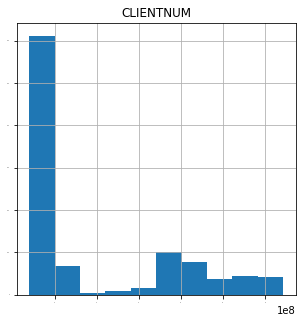

This histogram shows how the bank numbers its employees starting from 0, it is not particularly relevant

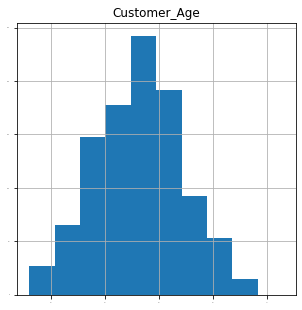

This histogram shows that the majority of users have an average age of around 40 years

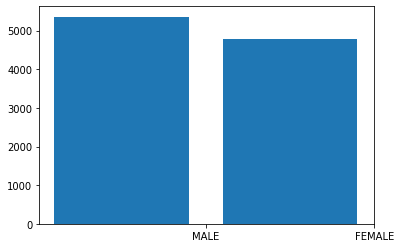

This histogram shows that the distribution of accounts between the gender is fairly even, albeit in favor of men

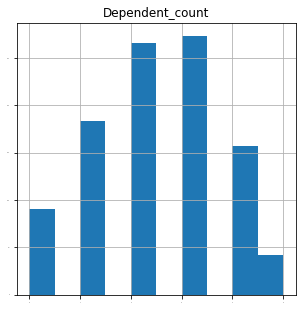

This histogram shows how the bank numbers its employees starting from 0, it is not particularly relevant

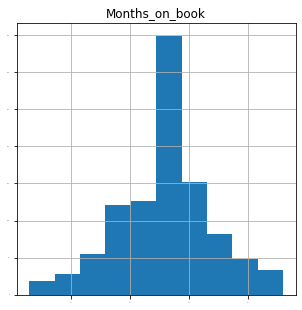

This histogram shows that the majority of customers have had an active expense for several months

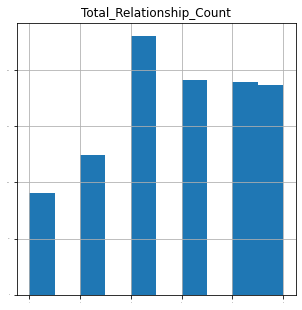

This histogram highlights that there is no particular link between user and a specific number of relationships

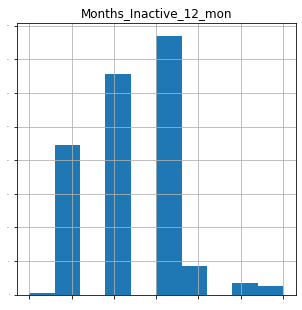

This histogram shows that the period of inactivity of the account does not extend for a long time, perhaps it is due to the intervention of the bank

Pay attention:

There are no values missing. So there is to be done.

There are some outliers that should be removed.

I have removed all coloums where the name is longer than 30. They are not important.

The calculation of certain functions has sometimes proved complex due to the nature of the data, not "int".

In [7]:
ClientNum = df.hist(column='CLIENTNUM', xlabelsize=1, ylabelsize=1, figsize=[5,5])
plt.show()
display(Markdown('This histogram shows how the bank numbers its employees starting from 0, it is not particularly relevant'))

#attrition_flag = df.hist(column='Attrition_Flag', xlabelsize=1, ylabelsize=1, figsize=[5,5])
customer_Age = df.hist(column='Customer_Age', xlabelsize=1, ylabelsize=1, figsize=[5,5])     
plt.show()
display(Markdown('This histogram shows that the majority of users have an average age of around 40 years'))

Mfunc = df[df["Gender"]=="F"].count()
MfuncVal = int(Mfunc[1])
Ffunc = df[df["Gender"]=="M"].count()
FfuncVal = int(Ffunc[1])
vals=[MfuncVal,FfuncVal]
inds=range(len(vals))
labels=["MALE","FEMALE"]
fig,ax = plt.subplots()
rects = ax.bar(inds, vals)
Res1 = ax.set_xticks([ind+0.5 for ind in inds])
Res2 = ax.set_xticklabels(labels)    
plt.show()
display(Markdown('This histogram shows that the distribution of accounts between the gender is fairly even, albeit in favor of men'))


dependent_count = df.hist(column='Dependent_count', xlabelsize=1, ylabelsize=1, figsize=[5,5])
plt.show()
display(Markdown('This histogram shows how the bank numbers its employees starting from 0, it is not particularly relevant'))

#education_level = df.hist(column='Education_Level', xlabelsize=1, ylabelsize=1, figsize=[5,5])
#marital_status = df.hist(column='Marital_Status', xlabelsize=1, ylabelsize=1, figsize=[5,5])
#income_category = df.hist(column='Income_Category', xlabelsize=1, ylabelsize=1, figsize=[5,5])
#card_category = df.hist(column='Card_Category ', xlabelsize=1, ylabelsize=1, figsize=[5,5])
months_on_book = df.hist(column='Months_on_book', xlabelsize=1, ylabelsize=1, figsize=[5,5])
plt.show()
display(Markdown('This histogram shows that the majority of customers have had an active expense for several months'))

total_Relationship_count = df.hist(column='Total_Relationship_Count', xlabelsize=1, ylabelsize=1, figsize=[5,5])
plt.show()
display(Markdown('This histogram highlights that there is no particular link between user and a specific number of relationships'))

months_inactive_12_mon = df.hist(column='Months_Inactive_12_mon', xlabelsize=1, ylabelsize=1, figsize=[5,5])
plt.show()
display(Markdown('This histogram shows that the period of inactivity of the account does not extend for a long time, perhaps it is due to the intervention of the bank'))

display(Markdown('Pay attention:'))
display(Markdown('There are no values missing. So there is to be done.'))
display(Markdown('There are some outliers that should be removed.'))
display(Markdown('I have removed all coloums where the name is longer than 30. They are not important.'))
display(Markdown('The calculation of certain functions has sometimes proved complex due to the nature of the data, not "int".'))

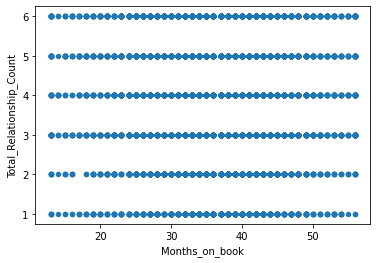

This scatter plot shows that there is no particular correlation between the months on book and the number of user relationships

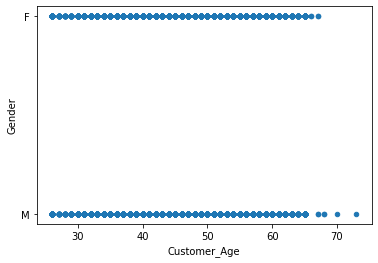

This scatter plot shows that the most anxious clients are men

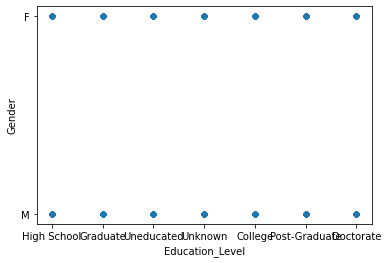

This scatter plot highlights that there is no particular correlation between gender and educational qualification in banking profiles

In [8]:
#SCATTERPLOT
sp1= df.plot.scatter('Months_on_book','Total_Relationship_Count')
plt.show()
display(Markdown('This scatter plot shows that there is no particular correlation between the months on book and the number of user relationships'))

sp2= df.plot.scatter('Customer_Age','Gender')
plt.show()
display(Markdown('This scatter plot shows that the most anxious clients are men'))

sp3= df.plot.scatter('Education_Level','Gender')
plt.show()
display(Markdown('This scatter plot highlights that there is no particular correlation between gender and educational qualification in banking profiles'))

In [9]:
#COVIARIANCE
display(df.cov())

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon
CLIENTNUM,1.361889e+15,2.252209e+06,324600.732489,3.966693e+07,396204.467439,213649.963677
Customer_Age,2.252209e+06,6.426931e+01,-1.273041,5.051060e+01,-0.136216,0.440431
Dependent_count,3.246007e+05,-1.273041e+00,1.687163,-1.069129e+00,-0.078897,-0.014135
Months_on_book,3.966693e+07,5.051060e+01,-1.069129,6.378285e+01,-0.114248,0.598592
Total_Relationship_Count,3.962045e+05,-1.362164e-01,-0.078897,-1.142484e-01,2.416184,-0.005774
Months_Inactive_12_mon,2.136500e+05,4.404313e-01,-0.014135,5.985924e-01,-0.005774,1.021358


In [10]:
#CORRELATION
display(df.corr())

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon
CLIENTNUM,1.000000,0.007613,0.006772,0.134588,0.006907,0.005729
Customer_Age,0.007613,1.000000,-0.122254,0.788912,-0.010931,0.054361
Dependent_count,0.006772,-0.122254,1.000000,-0.103062,-0.039076,-0.010768
Months_on_book,0.134588,0.788912,-0.103062,1.000000,-0.009203,0.074164
Total_Relationship_Count,0.006907,-0.010931,-0.039076,-0.009203,1.000000,-0.003675
Months_Inactive_12_mon,0.005729,0.054361,-0.010768,0.074164,-0.003675,1.000000


In [11]:
# Data without Normalization
#display(Markdown('Data without Normalization'))
#print("Data = ", Ndf)

# Data with Normalization
display(Markdown('Data with Normalization'))
normalized = preprocessing.normalize(Ndf)
display("Normalized Data = ", normalized)

Data with Normalization

'Normalized Data = '

array([[1.00000000e+00, 5.85323685e-08, 3.90215790e-09, 5.07280527e-08,
        6.50359650e-09, 1.30071930e-09],
       [1.00000000e+00, 5.98458658e-08, 6.10672100e-09, 5.37391448e-08,
        7.32806520e-09, 1.22134420e-09],
       [1.00000000e+00, 7.14303614e-08, 4.20178596e-09, 5.04214316e-08,
        5.60238129e-09, 1.40059532e-09],
       ...,
       [1.00000000e+00, 6.14091088e-08, 1.39566156e-09, 5.02438163e-08,
        6.97830782e-09, 4.18698469e-09],
       [1.00000000e+00, 4.18172679e-08, 2.78781786e-09, 5.01807215e-08,
        5.57563572e-09, 4.18172679e-09],
       [1.00000000e+00, 6.01956583e-08, 2.79979806e-09, 3.49974758e-08,
        8.39939418e-09, 2.79979806e-09]])